# CS5920J Assessed Coursework Assignment 2

In [1]:
#Importing modules
import numpy as np
import math
import matplotlib.pyplot as plt

Loading Diabetes Dataset from Sklearn

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Splitting the data into Traning and test set with random state 

In [3]:
#Splitting the data into Traning and test set with random state DDMM
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,random_state=100)

In [4]:
np.shape(X_train)

(331, 10)

In [5]:
np.shape(X_test)

(111, 10)

# Applying Lasso

In [6]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)

In [7]:
lasso.coef_

array([  0.        ,  -0.        , 375.33426866,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       302.34970712,   0.        ])

In [8]:
print("Training R Square: ", lasso.score(X_train,y_train))
print("Test R Square: ",lasso.score(X_test,y_test))

Training R Square:  0.3542098757353431
Test R Square:  0.3409285780866096


In [9]:
print("Number of features used in the model:",np.sum(lasso.coef_!= 0))

Number of features used in the model: 2


In [10]:
print("The features used are:\n")
index = np.where(lasso.coef_ != 0)[0]
for i in index:
    print(diabetes.feature_names[i])


The features used are:

bmi
s5


Loading Original Diabetes Dataset

In [11]:
diabetes_data = np.genfromtxt("diabetes.txt", delimiter="\t")
np.shape(diabetes_data)

(443, 11)

In [12]:
#Cleaning data to remove rows with NaN
diabetes_data = diabetes_data[~np.isnan(diabetes_data).any(axis=1),:]

In [13]:
diabetes_data

array([[ 59.    ,   2.    ,  32.1   , ...,   4.8598,  87.    , 151.    ],
       [ 48.    ,   1.    ,  21.6   , ...,   3.8918,  69.    ,  75.    ],
       [ 72.    ,   2.    ,  30.5   , ...,   4.6728,  85.    , 141.    ],
       ...,
       [ 60.    ,   2.    ,  24.9   , ...,   4.1271,  95.    , 132.    ],
       [ 36.    ,   1.    ,  30.    , ...,   5.1299,  85.    , 220.    ],
       [ 36.    ,   1.    ,  19.6   , ...,   4.5951,  92.    ,  57.    ]])

In [14]:
np.shape(diabetes_data)

(442, 11)

In [15]:
#Splitting Data into features and targets
data = diabetes_data[:,0:10]
target = diabetes_data[:,10]

In [16]:
data

array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
       [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
       [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
       ...,
       [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
       [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
       [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]])

In [17]:
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [18]:
#Splitting the data into Training and test set with random state
X_train, X_test, y_train, y_test = train_test_split(data, target,random_state=100)
lasso1 = Lasso().fit(X_train,y_train)
lasso1.coef_

array([-1.08257075e-01, -1.42375582e+01,  6.39075221e+00,  9.83909460e-01,
        1.38740602e-02, -2.38916156e-01, -8.09500939e-01,  0.00000000e+00,
        4.12095139e+01,  3.25546893e-01])

In [19]:
print("Training R Square: ",lasso1.score(X_train,y_train))
print("Test R Square: ",lasso1.score(X_test,y_test))

Training R Square:  0.5003425134619269
Test R Square:  0.5239875510696832


In [20]:
print("Number of features used in the model:",np.sum(lasso1.coef_!= 0))

Number of features used in the model: 9


In [21]:
print("The features used are:\n")
index = np.where(lasso1.coef_ != 0)[0]
for i in index:
    print(diabetes.feature_names[i])

The features used are:

age
sex
bmi
bp
s1
s2
s3
s5
s6


Applying Lasso on the original dataset we observe that more coefficients are used and both training and test R square are better than the lasso on sklearn dataset.

# Preprocessing Data using Standard scalar

In [22]:
#Importing standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
#Fitting the scalar to traing set
scaler.fit(X_train)

StandardScaler()

In [24]:
# transforming training data
X_train_scaled = scaler.transform(X_train)
# transform test data
X_test_scaled = scaler.transform(X_test)

# Applying Lasso on Scalled Data

In [25]:
lasso_scaled = Lasso().fit(X_train_scaled,y_train)
lasso_scaled.coef_

array([-0.12331166, -7.73555757, 27.61993632, 12.39137475, -7.30496121,
       -0.        , -6.70165852,  0.        , 27.2567993 ,  2.11841139])

In [26]:
print("Training R Square: ",lasso_scaled.score(X_train_scaled,y_train))
print("Test R Square: ",lasso_scaled.score(X_test_scaled,y_test))

Training R Square:  0.5022624249890308
Test R Square:  0.5244242564754884


In [27]:
print("Number of features used in the model:",np.sum(lasso_scaled.coef_!= 0))

Number of features used in the model: 8


In [28]:
print("The features used are:\n")
index = np.where(lasso_scaled.coef_ != 0)[0]
for i in index:
    print(diabetes.feature_names[i])

The features used are:

age
sex
bmi
bp
s1
s3
s5
s6


Applying Lasso on Scaled original dataset we observe 8 features used in the model which is less than the nonscaled data, the test and training R square values have improved more. 

The result is more near to one obtained in task 6 and not 3. One possible reason may be that sklearn normalized data set is normalized as a whole whereas in task 8 we have done standard scaling based on the training data. Also the normalization method used which is different may be a contributing factor.

# Checking results of Varying Alpha

In [29]:
results = np.zeros([16,2])
alpha = [10**-4,10**-3,10**-2,10**-2,10**-1,1,5,10,15,20,25,30,35,40,45,50]
row=0
for i in alpha:
    lassox = Lasso(alpha=i).fit(X_train_scaled,y_train)
    results[row][0]= np.sum(lassox.coef_ != 0)
    results[row][1]= lassox.score(X_test_scaled,y_test)    
    row= row+1  

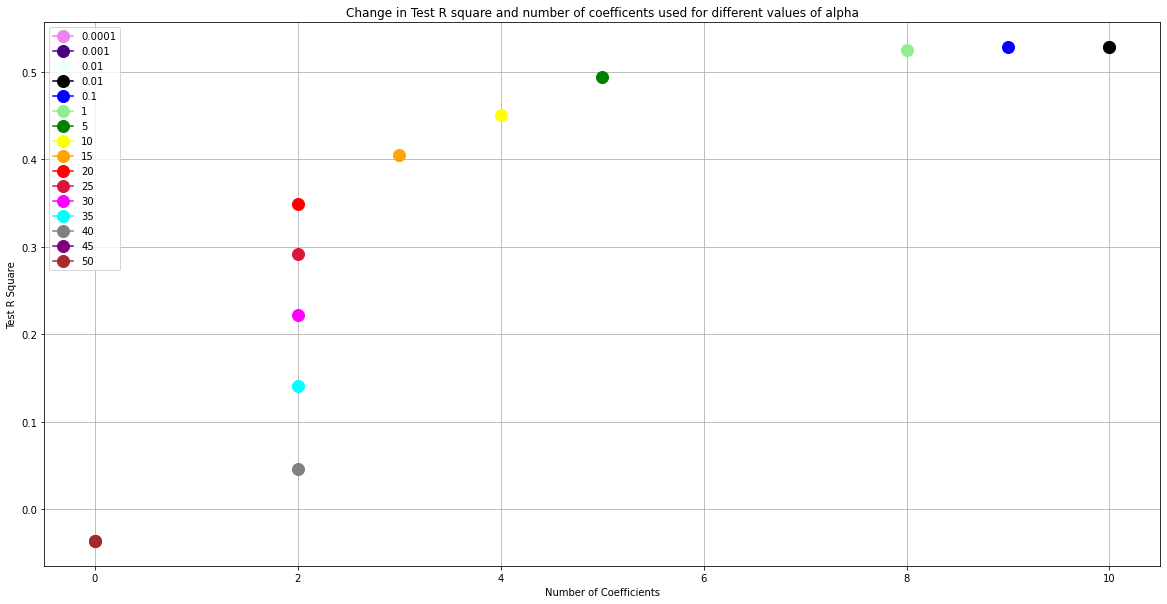

In [30]:
import matplotlib.pyplot as plt 
color = ["Violet","indigo","azure","black","Blue","lightgreen","Green","Yellow","Orange","red","crimson","magenta","cyan","grey","purple","brown","olive"]
plt.figure(figsize=[20,10])
for i in range(0,16) :
    plt.plot(results[i,0],results[i,1],c=color[i],marker='o',markersize=12,label=alpha[i])
plt.xlabel("Number of Coefficients")
plt.ylabel("Test R Square")
plt.title("Change in Test R square and number of coefficents used for different values of alpha")
plt.grid(b=True)
plt.legend()

The highest value of Test R square is observed for alpha = 10 post which the R square value starts to decrease again. Hence alpha = 10 provides the best performing model for the test set. 

As the value of alpha increases the error rate decreases till a certain point and then again starts to increase. Is point is the one with highest R square and the point of best alpha/model.

In [31]:
X_train_pr, X_valid, y_train_pr, y_valid = train_test_split(X_train_scaled,y_train, random_state=1214)
best_score = 0
validated_results = np.zeros([16,2])
alpha = [10**-4,10**-3,10**-2,10**-2,10**-1,1,5,10,15,20,25,30,35,40,45,50]
for i in alpha:
    lassox = Lasso(alpha=i).fit(X_train_pr,y_train_pr)
    score = lassox.score(X_valid,y_valid)
    print("Alpha: ",i," Validation R Square: ",score)
    if score > best_score :
        best_alpha = i
        best_score = score
lasso_best = Lasso(alpha=best_alpha).fit(X_train,y_train)
train_score = lasso_best.score(X_train,y_train)
test_score = lasso_best.score(X_test,y_test)
print("")
print("Best parameter alpha:", best_alpha)
print("Number of parameters used:", np.sum(lasso_best.coef_ != 0))
print("Training set R square with best parameters:", train_score) 
print("Test set R square with best parameters:", test_score)       

Alpha:  0.0001  Validation R Square:  0.5109246484421335
Alpha:  0.001  Validation R Square:  0.5109013598795358
Alpha:  0.01  Validation R Square:  0.5106640141684604
Alpha:  0.01  Validation R Square:  0.5106640141684604
Alpha:  0.1  Validation R Square:  0.5078504925228695
Alpha:  1  Validation R Square:  0.5011291092156063
Alpha:  5  Validation R Square:  0.4644097502349728
Alpha:  10  Validation R Square:  0.4366073493597239
Alpha:  15  Validation R Square:  0.4012185848679478
Alpha:  20  Validation R Square:  0.35428644014998956
Alpha:  25  Validation R Square:  0.29831916128349123
Alpha:  30  Validation R Square:  0.2331230144073443
Alpha:  35  Validation R Square:  0.15743611274666358
Alpha:  40  Validation R Square:  0.08436514605126189
Alpha:  45  Validation R Square:  0.024178446994995495
Alpha:  50  Validation R Square:  -0.000808003894725573

Best parameter alpha: 0.0001
Number of parameters used: 10
Training set R square with best parameters: 0.5063883300861198
Test set R

# Results:

Lasso on Diabetes dataset from sklearn:

    Training R Square:  0.3710490118794657
    Test R Square:  0.32847652173697683
    
    Number of features used in the model: 4
    
    The features used are:

    bmi
    bp
    s3
    s5
    
Lasso on original Diabetes dataset:

    Training R Square:  0.537308531659811
    Test R Square:  0.3626403051692718
    
    Number of features used in the model: 10
    
    The features used are:
    
    age
    sex
    bmi
    bp
    s1
    s2
    s3
    s4
    s5
    s6
    
Lasso on scaled original Dataset:

    Training R Square:  0.5401388610861284
    Test R Square:  0.3796442379645816
    
    Number of features used in the model: 8
    
    The features used are:
    
    sex
    bmi
    bp
    s1
    s3
    s4
    s5
    s6
